In [1]:
import pandas as pd
import numpy as np
import os

# Define the folder path and file name
Folder_path = r"C:\Users\Lenovo\INSAID-Fraud-Detection-Model-for-Financial-Transactions"
file_name = "Fraud.csv"

# Combine the folder path and file name into a full file path
full_path = os.path.join(Folder_path, file_name)

# Check if the file exists
if os.path.exists(full_path):
    print("File Exists")  
    print("Reading file into dataframe.")    
    # Read the file into a DataFrame
    df = pd.read_csv(full_path)    
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print('File doesn\'t exist')

File Exists
Reading file into dataframe.
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [2]:
Column_Name =df.columns
print("Column Name in the fraud.csv file, Total Column : ",len(Column_Name))
print(Column_Name)
# Identify numerical features
numerical_features = df.select_dtypes(include=['int', 'float']).columns
num_numerical_features = len(numerical_features)
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns
num_categorical_features = len(categorical_features)
print("Number of numerical features:", num_numerical_features)
print("Numerical Feature Column Name: ",numerical_features)
print("Number of categorical features:", num_categorical_features)
print("categorical Feature Column Name: ",categorical_features)
#Find the number of missing values in Pandas
#NaN (Not a Number) and None are treated as missing values in Pandas.
print(df.isna().sum())

Column Name in the fraud.csv file, Total Column :  11
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
Number of numerical features: 8
Numerical Feature Column Name:  Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
Number of categorical features: 3
categorical Feature Column Name:  Index(['type', 'nameOrig', 'nameDest'], dtype='object')
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


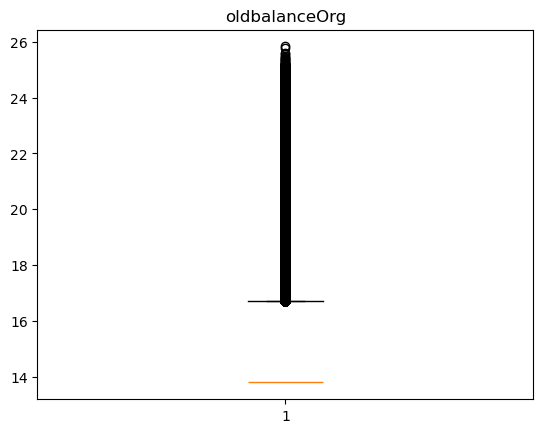

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


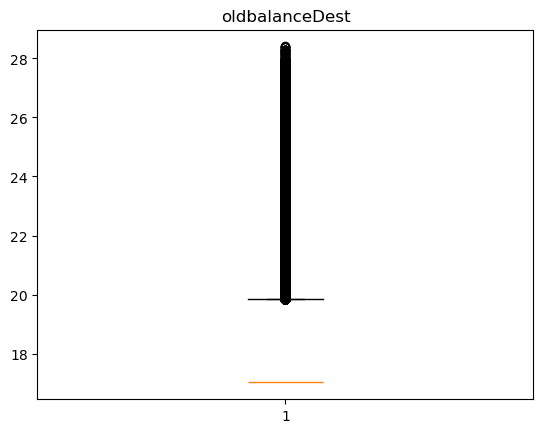

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


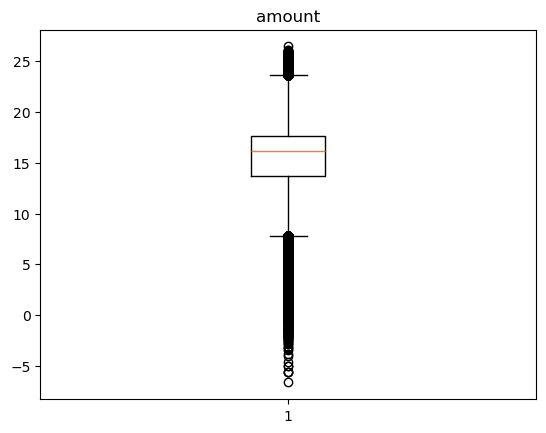

In [3]:
import matplotlib.pyplot as plt
item = ['oldbalanceOrg','oldbalanceDest','amount']
for i in item:
    # Creating plot for column oldbalanceOrg
    # Hist, Bar : plt.bar(df['step'],df[i]), Box plot 
    plt.boxplot(np.log2(df[i]))
    plt.title(i)
    # show plot
    plt.show()

In [4]:
unique_values = df['type'].unique()
print("Unique Value in Column type is ",unique_values)
print("Count of unique value in column ")
print(df['type'].value_counts())

Unique Value in Column type is  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Count of unique value in column 
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [5]:
type_of_trans = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
# Count fraud and non-fraud cases for each transaction type
fraud_counts = df[df['isFraud'] == 1].groupby('type').size().reindex(type_of_trans, fill_value=0)
non_fraud_counts = df[df['isFraud'] == 0].groupby('type').size().reindex(type_of_trans, fill_value=0)
# Create a summary DataFrame
summary_df = pd.DataFrame({'Transaction Type': type_of_trans,'Fraud Cases': fraud_counts.values,'Non-Fraud Cases': non_fraud_counts.values})
print("Count of Fraud and Non-Fraud Cases by Transaction Type:")
print(summary_df)

Count of Fraud and Non-Fraud Cases by Transaction Type:
  Transaction Type  Fraud Cases  Non-Fraud Cases
0          PAYMENT            0          2151495
1         TRANSFER         4097           528812
2         CASH_OUT         4116          2233384
3            DEBIT            0            41432
4          CASH_IN            0          1399284


TRANSFER Fraud Cases:
Min Amount: 63.8, Max Amount: 10000000.0, Mean Amount: 1480891.6729338542

CASH_OUT Fraud Cases:
Min Amount: 0.0, Max Amount: 10000000.0, Mean Amount: 1455102.5859645286


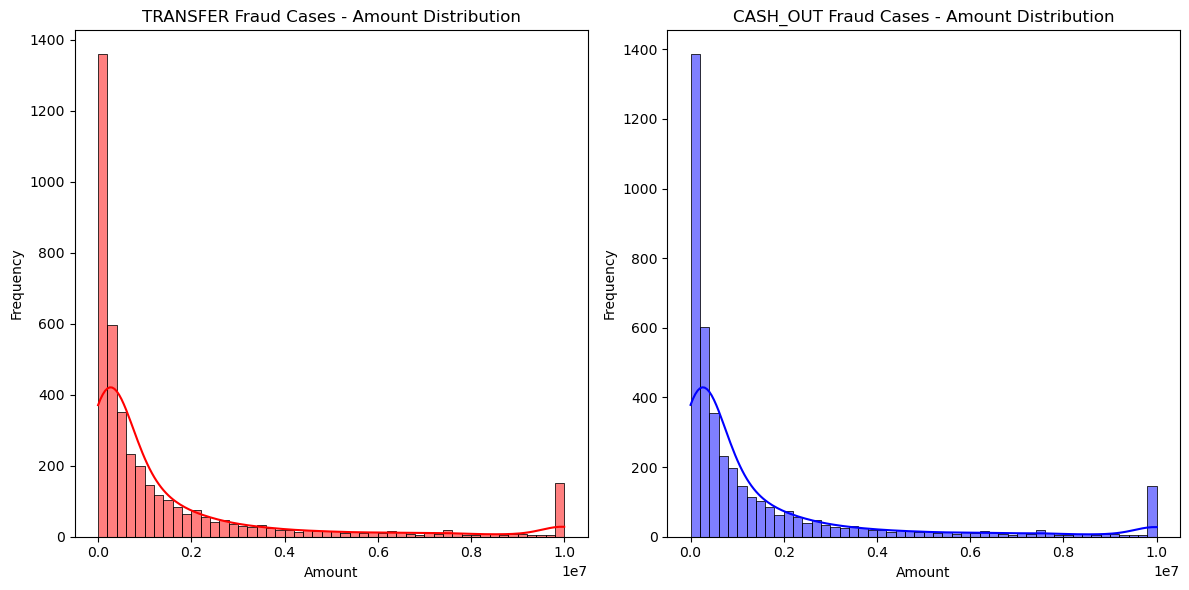

In [6]:
import seaborn as sns
# Filter fraud cases for TRANSFER and CASH_OUT
fraud_transfer = df[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]
fraud_cash_out = df[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]

# Calculate min, max, and mean for TRANSFER fraud cases
transfer_min = fraud_transfer['amount'].min()
transfer_max = fraud_transfer['amount'].max()
transfer_mean = fraud_transfer['amount'].mean()

# Calculate min, max, and mean for CASH_OUT fraud cases
cash_out_min = fraud_cash_out['amount'].min()
cash_out_max = fraud_cash_out['amount'].max()
cash_out_mean = fraud_cash_out['amount'].mean()

print("TRANSFER Fraud Cases:")
print(f"Min Amount: {transfer_min}, Max Amount: {transfer_max}, Mean Amount: {transfer_mean}")

print("\nCASH_OUT Fraud Cases:")
print(f"Min Amount: {cash_out_min}, Max Amount: {cash_out_max}, Mean Amount: {cash_out_mean}")

# Plot histograms separately
plt.figure(figsize=(12, 6))

# Histogram for TRANSFER fraud cases
plt.subplot(1, 2, 1)
sns.histplot(fraud_transfer['amount'], bins=50, color='red', kde=True)
plt.title('TRANSFER Fraud Cases - Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Histogram for CASH_OUT fraud cases
plt.subplot(1, 2, 2)
sns.histplot(fraud_cash_out['amount'], bins=50, color='blue', kde=True)
plt.title('CASH_OUT Fraud Cases - Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
from sklearn.preprocessing import OneHotEncoder
# Creating copy of the data frame for safer side
data = df.copy()
categorical_columns = ['type']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
data_encoded = pd.concat([data, one_hot_data], axis=1)
data_encoded = data_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{data_encoded.head()}")
# Getting Modified categorical Column 
mod_cat_col = data_encoded.columns

Encoded Employee data : 
   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  \
0             0.0             0.0        0               0           0.0   
1             0.0             0.0        0               0           0.0   
2             0.0             0.0        1               0           0.0   
3         21182.0             0.0        1               0           0.0   
4             0.0             0.0        0               0           0.0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_

                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   
isFraud         0.076688       0.010154       -0.008148       -0.005885   
isFlaggedFraud  0.012295       0.003835        0.003776       -0.000513   
type_CASH_IN   -0.009621       0.506761        0.527373        0.076105   
type_CASH_OUT  -0.004376      -0.200899       -0.210977        0.086028   
type_DEBIT     -0.023379      -0.021450       -0.021872        0.009347   
type_PAYMENT   -0.197444      -0.189486       -0.193915       -0.231455   
type_TRANSFER   0.365896      -0.081593       -0.087355        0.130476   

                newbalan

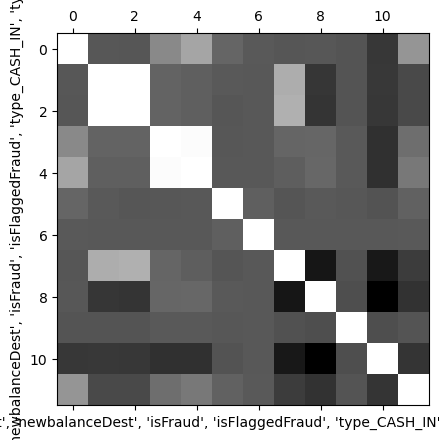

Sorted Maximum Correlation Values:
oldbalanceOrg has maximum correlation with newbalanceOrig: 0.9988
newbalanceOrig has maximum correlation with oldbalanceOrg: 0.9988
oldbalanceDest has maximum correlation with newbalanceDest: 0.9766
newbalanceDest has maximum correlation with oldbalanceDest: 0.9766
type_CASH_IN has maximum correlation with newbalanceOrig: 0.5274
amount has maximum correlation with newbalanceDest: 0.4593
type_TRANSFER has maximum correlation with amount: 0.3659
type_CASH_OUT has maximum correlation with newbalanceDest: 0.0935
isFraud has maximum correlation with amount: 0.0767
isFlaggedFraud has maximum correlation with isFraud: 0.0441
type_DEBIT has maximum correlation with oldbalanceDest: 0.0093
type_PAYMENT has maximum correlation with isFlaggedFraud: -0.0011


In [9]:
#Here not including the 2 categorical columns ['nameOrig', 'nameDest'] for further analysis so
mod_num_col = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
               'newbalanceDest', 'isFraud','isFlaggedFraud', 'type_CASH_IN', 
               'type_CASH_OUT', 'type_DEBIT','type_PAYMENT', 'type_TRANSFER']

data_mod_encoded = data_encoded[mod_num_col]
corr_matrix = data_mod_encoded.corr(method='pearson')
print(corr_matrix)
# Sorting or plotting the correlation between the different column
plt.matshow(corr_matrix, cmap=plt.cm.gray)
plt.xlabel(mod_num_col)
plt.ylabel(mod_num_col)
plt.show()
# Create a DataFrame to store the correlation values
corr_df = pd.DataFrame(corr_matrix)
# Initialize a dictionary to store the maximum correlation values and corresponding column names
max_corr_dict = {}
# Iterate through the correlation matrix to find the maximum correlation for each column
for col in corr_df.columns:
    max_corr = corr_df[col].drop(col).max()  # Exclude self-correlation
    max_corr_col = corr_df[col].drop(col).idxmax()
    max_corr_dict[col] = (max_corr_col, max_corr)
# Sort the dictionary by maximum correlation values in descending order
sorted_max_corr = sorted(max_corr_dict.items(), key=lambda x: x[1][1], reverse=True)
# Display the sorted results
print("Sorted Maximum Correlation Values:")
for col, (max_col, max_val) in sorted_max_corr:
    print(f"{col} has maximum correlation with {max_col}: {max_val:.4f}")

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_encoded[mod_num_col]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

           feature         VIF
0           amount    4.070943
1    oldbalanceOrg  669.074835
2   newbalanceOrig  688.656291
3   oldbalanceDest   68.524775
4   newbalanceDest   78.925382
5          isFraud    1.225252
6   isFlaggedFraud    1.002818
7     type_CASH_IN    2.180069
8    type_CASH_OUT    1.107247
9       type_DEBIT    1.001438
10    type_PAYMENT    1.001904
11   type_TRANSFER    1.242269


In [12]:
mod_num_col = ['amount', 'oldbalanceOrg', 'oldbalanceDest',
                'isFraud','isFlaggedFraud', 'type_CASH_IN', 
                'type_CASH_OUT', 'type_DEBIT','type_PAYMENT', 'type_TRANSFER']
X = data_encoded[mod_num_col]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0          amount  1.257448
1   oldbalanceOrg  1.347950
2  oldbalanceDest  1.136286
3         isFraud  1.010589
4  isFlaggedFraud  1.002057
5    type_CASH_IN  1.507540
6   type_CASH_OUT  1.088977
7      type_DEBIT  1.001412
8    type_PAYMENT  1.000456
9   type_TRANSFER  1.237795
